# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2


In [1]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109, stratify=y)

### Vamos a construir un ensemble AdaBoost con árboles de decisión como base. Vamos a variar el número de modelos base y la profundidad máxima de los árboles de decisión.

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

range_T = [50, 100, 200, 500, 1000] # Modelos base

    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 2 and t =",
        t_,
        "The accuracy is :",
        acc,
    )
    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 3 and t =",
        t_,
        "The accuracy is :",
        acc,
    )
    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 4 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

    
for t_ in range_T:
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=t_, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print(
        "For max_depth = 5 and t =",
        t_,
        "The accuracy is :",
        acc,
    )

For max_depth = 2 and t = 50 The accuracy is : 0.48148148148148145
For max_depth = 2 and t = 100 The accuracy is : 0.48148148148148145
For max_depth = 2 and t = 200 The accuracy is : 0.48148148148148145
For max_depth = 2 and t = 500 The accuracy is : 0.48148148148148145
For max_depth = 2 and t = 1000 The accuracy is : 0.48148148148148145
For max_depth = 3 and t = 50 The accuracy is : 0.8537037037037037
For max_depth = 3 and t = 100 The accuracy is : 0.9092592592592592
For max_depth = 3 and t = 200 The accuracy is : 0.9277777777777778
For max_depth = 3 and t = 500 The accuracy is : 0.9407407407407408
For max_depth = 3 and t = 1000 The accuracy is : 0.9462962962962963
For max_depth = 4 and t = 50 The accuracy is : 0.8944444444444445
For max_depth = 4 and t = 100 The accuracy is : 0.9259259259259259
For max_depth = 4 and t = 200 The accuracy is : 0.9518518518518518
For max_depth = 4 and t = 500 The accuracy is : 0.9629629629629629
For max_depth = 4 and t = 1000 The accuracy is : 0.9703703

Ver parámetros en: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

### El modelo más complejo resultó ser el mejor

In [4]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=1000, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)

### Staged perdict nos permite evaluar el error de testing en función de T (número de árboles base)

In [5]:
from sklearn.metrics import accuracy_score

test_errors = []

for test_predict in clf.staged_predict(X_test):
    test_errors.append(1.0 - accuracy_score(test_predict, y_test))
    

Text(0.5, 0, 'Number of Trees')

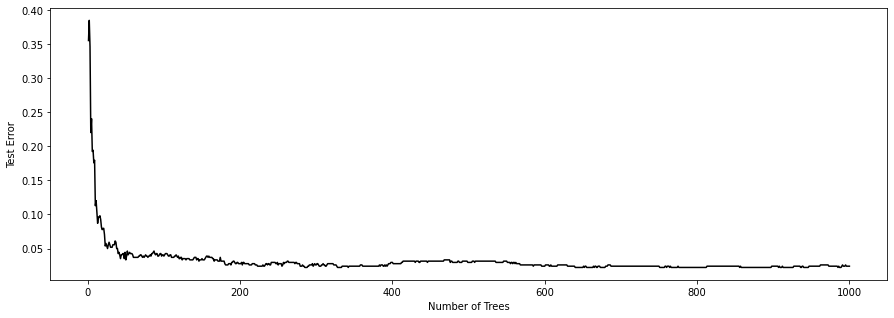

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(range(1, len(clf) + 1), test_errors, c="black")
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

### Se ve que el error baja rápidamente. Las mejoras agregando más árboles son pequeñas. 